# Problem Set 4
# Name: Nikhil Chakravarthy Chakkirala
# UBIT: nchakkir

# Soln 1:

# a. To show that a neural network has to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of the given dataset.



# Softmax function:
In mathematics, the softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. That is, prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1; but after applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities.

Example:

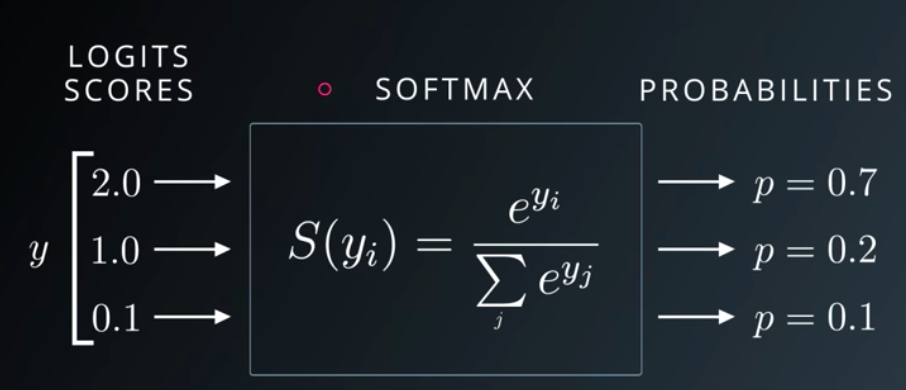

The conditional probability of each class is given by

$p(t_{m}|x;w)=\prod_{m=1}^{M}y_{m}(x,w)^{t_m}.(1-y_{m}(x,w)^{1-t_m}$

where y(x,w) is the output of the neural network.

After one-hot encoding the above equation for multiple classes, we get

$p(t_{m}|x;w)=\prod_{n=1}^{N}\prod_{m=1}^{M}y_m(x_{n},w)^{t_{m}}$

The main aim is to find the parameter $w$ such that the likelihood is maximized.

$\hat{w}=argmax_{w}\prod_{n=1}^{N}\prod_{m=1}^{M}y_{m}(x_{n},w)^{t_m}$

# Negative Log-likelihood Function

In a neural network, we always try to minimize the loss function. By applying Softmax function, we get each term as a probability as mentioned. So, taking the product of such values obviously results in a much smaller value. In some cases, it can lead to values very close to zero. To avoid these cases, we apply logarithm to maintain a decent value and to convert the complex multiplication to much simpler addition. But, since the log of values in the range {0,1} will be negative, we therefore apply negative log to make the end result positive.

Hence, we have
   $Negative LogLikelihood=argmax_{w}(-log(\prod_{n=1}^{N}\prod_{m=1}^{M}y_{m}(x_{n},w)^{t_m}$
   
   $=-argmin_{w}(\sum_{n=1}^{N}\sum{m=1}^{M}t_{m}log(y_{m}(x_{n}w)))$
   
   $=-argmin_{w}(\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}log(p(t_{m}|x_{n};w)))$
   
Therefore, a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set:

$J_{0}(w)=-log({x_{n},t_{n}):n=1,2,...,};w)=-log\prod_{n}\prod_{m=0}^{M}p(t_{n}=m|x_{n};w)$

# To demonstrate that a neural network to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution $p(w;\alpha)=N(0,\alpha l)$ is one that minimizes the criterion function with L2 regularization $J(w)=J_{0}(w)-log p(w;\alpha^{-1})$



Assume we want to infer some parameter $\beta$ from some observed input-output pairs (x1,y1),...,(xN,yN). Assuming that the outputs are linearly related to the inputs via $\beta$ and that the data is corrupted by some noise $\epsilon$:

$y_{n}=\beta x_{n}+\epsilon$
where $\epsilon$ is the Gaussian noise with mean 0 and variance $\sigma^{2}$. This gives rise to a Gaussian likelihood:

$\prod_{n=1}^{N}N(t_{n}|\beta x_{n},\sigma^{2})$

After regularizing the $\beta$ parameter by imposing the Gaussian prior $N(\beta|0,\lambda^{-1})$, where $\lambda$ is a strictly positive scalar and combining thelikelihood and the prior we get

$\prod_{n=1}^{N}N(y_{n}|\beta x_{n},\sigma^{2})N(\beta|0,\lambda^{-1})$

By taking logarithm and dropping some constants we get

$\sum_{n=1}^{N}(-1/sigma^{2})(y_{n}-\beta x_{n})^2-\lambda\beta^{2}+constant$

Maximum aposteriori estimation is:
$=argmax_{w}p(D;w)p(w)$
$=argmax_{w}p(t|x;w)p(w)$
$=-\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}log(p(t_{m}|x_{n},w))-\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}log(p(w))$

we have, 
Gaussian distribution $p(w_{i})=(1/\sqrt{2\pi \alpha^{-1}})e^{-(w_{i})^{2}/2_{a}-1}$

Applying log on both sides, we get
$log(p(w_{i}))=log((1/\sqrt{2\pi \alpha^{-1}})e^{-(w_{i})^{2}/2_{a}-1})$

$=log(1/\sqrt{2\pi \alpha^{-1}})+log(e^{-(w_{i})^{2}/2_{a}-1})$

$=log(1/\sqrt{2\pi \alpha^{-1}})-\alpha (w_{n}^{2}/2)$

Let k=$log(1/\sqrt{2\pi \alpha^{-1}})$

So, we get   $k-\alpha (w_{n}^{2}/2)$

Hence, the maximum aposteriori is $=\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}log(p(t_{m}|x_{n},w))-\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}log(p(w))$

$=-\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}log(p(t_{m}|x_{n},w))+\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}t_{m}\alpha (w_{n}^{2}/2)$

$=-\sum_{n=1}^{N}\sum_{m=1}^{M}t_{m}log(p(t_{m}|x_{n},w))+\alpha||w_{n}||^{2}_{2}/2$


# Soln 2a:

Specifications:

-->1 hidden layer of 30 sigmoid nodes

-->Output layer of 10 softmax nodes

-->1000 training images

-->1000 testing images

-->Learning Rate 0.1

-->30 epochs

-->Mini-batches of 10 images at a time

In [171]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import regularizers
import keras
from keras.datasets import mnist


In [172]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# Importing the dataset from keras
(data_train, label_train),(data_test, label_test)=tf.keras.datasets.mnist.load_data()

In [173]:
trainData=data_train.reshape(60000,784)
trainData=trainData/255.0
testData=data_test.reshape(10000,784)/255.0
trainLabels=label_train.reshape(60000,1)
testLabels=label_test.reshape(10000,1)

# Getting the required data:

In [174]:
trainDataPerDigit=[]
trainLabelPerDigit=[]
testDataPerDigit=[]
testLabelPerDigit=[]

# Getting 100 training images per label: Total 1000
for label in range(0,10):
    count=0
    for i in range(len(trainLabels)):
        if trainLabels[i]==label and count<100:
            count=count+1
            trainDataPerDigit.append(trainData[i])
            trainLabelPerDigit.append(trainLabels[i])

# Getting 100 test images per label: Total 1000
for label in range(0,10):
    count=0
    for i in range(len(testLabels)):
        if testLabels[i]==label and count<100:
            count=count+1
            testDataPerDigit.append(testData[i])
            testLabelPerDigit.append(testLabels[i])

trainDataPerDigit=np.asarray(trainDataPerDigit).reshape(1000,784)
trainLabelPerDigit=np.asarray(trainLabelPerDigit).reshape(1000)
testDataPerDigit=np.asarray(testDataPerDigit).reshape(1000,784)
testLabelPerDigit=np.asarray(testLabelPerDigit).reshape(1000)

# Functions for training the models and plotting the results:

In [175]:
def trainingModel1HL(model):
    accuracy=[]
    trainLoss=[]
    valAccuracy=[]
    trainValLoss=[]
    avgIn=[]
    avgOut=[]
    epochs=30
    for n in range(0,epochs):
        prevInputLayer=np.array(model.get_layer(index = 0).get_weights()[0])
        prevHiddenLayer=np.array(model.get_layer(index = 1).get_weights()[0])
        
        history=model.fit(x=trainDataPerDigit,y=trainLabelPerDigit,batch_size=10,epochs=1,validation_data=(testDataPerDigit,testLabelPerDigit))
        accuracy.append(history.history['accuracy'])
        trainLoss.append(history.history['loss'])
        valAccuracy.append(history.history['val_accuracy'])
        trainValLoss.append(history.history['val_loss'])

        InLayer = np.array(model.get_layer(index = 0).get_weights()[0])
        HidLayer = np.array(model.get_layer(index = 1).get_weights()[0])

        avgIWC = np.average(np.absolute((prevInputLayer - InLayer)/InLayer))
        avgHWC = np.average(np.absolute((prevHiddenLayer - HidLayer)/HidLayer))

        avgIn.append(avgIWC)
        avgOut.append(avgHWC)
    return [accuracy,valAccuracy,trainLoss,trainValLoss,avgIn,avgOut]

def plotModel1HL(tag,results):
    plt.figure()
    plt.title(tag+"Accuracy")
    plt.plot(results[0],label="Training Accuracy")
    plt.plot(results[1],label="Testing Accuracy")
    plt.legend()

    plt.figure()
    plt.title(tag+'Loss Per Epoch on 1000 Samples')
    #print(Results[0])
    L01_training = [1000* (1 - x[0]) for x in results[0]]
    L02_training = [1000* (1 - x[0]) for x in results[1]]
    plt.plot(L01_training, label = 'Training Error')
    plt.plot(L02_training, label = 'Testing Error')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.figure()
    plt.title(tag+'Training and Testing Criterion Function')
    plt.plot(results[2], label = 'Training Loss')
    plt.plot(results[3], label = 'Test Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.figure()
    plt.title(tag+'Average change in weights')
    plt.plot(results[4], label = 'Input to Hidden Weights')
    plt.plot(results[5], label = 'Hidden to Output Weights')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Change')

def trainingModel2Hl(model):
    accuracy=[]
    valAccuracy=[]
    trainLoss=[]
    trainValLoss=[]
    avgIn=[]
    avgH1=[]
    avgH2=[]
    epochs=30
    for n in range(0,epochs):
        prevInputLayer=np.array(model.get_layer(index = 0).get_weights()[0])
        prevHiddenLayer1=np.array(model.get_layer(index = 1).get_weights()[0])
        prevHiddenLayer2=np.array(model.get_layer(index=2).get_weights()[0])
        
        history=model.fit(x=trainDataPerDigit,y=trainLabelPerDigit,batch_size=10,epochs=1,validation_data=(testDataPerDigit,testLabelPerDigit))
        accuracy.append(history.history['accuracy'])
        trainLoss.append(history.history['loss'])
        valAccuracy.append(history.history['val_accuracy'])
        trainValLoss.append(history.history['val_loss'])
        
        InLayer = np.array(model.get_layer(index = 0).get_weights()[0])
        HidLayer1 = np.array(model.get_layer(index = 1).get_weights()[0])
        HidLayer2= np.array(model.get_layer(index = 2).get_weights()[0])

        avgIWC = np.average(np.absolute((prevInputLayer - InLayer)/InLayer))
        avgH1WC = np.average(np.absolute((prevHiddenLayer1 - HidLayer1)/HidLayer1))
        avgH2WC = np.average(np.absolute((prevHiddenLayer2 - HidLayer2)/HidLayer2))

        avgIn.append(avgIWC)
        avgH1.append(avgH1WC)
        avgH2.append(avgH2WC)

    return [accuracy,valAccuracy,trainLoss,trainValLoss,avgIn,avgH1,avgH2]

def plotModel2Hl(tag,results):
    plt.figure()
    plt.title(tag+"Accuracy")
    plt.plot(results[0],label="Training Accuracy")
    plt.plot(results[1],label="Testing Accuracy")
    plt.legend()

    plt.figure()
    plt.title(tag+'Loss Per Epoch on 1000 Samples')
    L01_training = [1000* (1 - x[0]) for x in results[0]]
    L02_training = [1000* (1 - x[0]) for x in results[1]]
    plt.plot(L01_training, label = 'Training Error')
    plt.plot(L02_training, label = 'Test Error')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.figure()
    plt.title(tag+'Training and Test Criterion Function')
    plt.plot(results[2], label = 'Training Loss')
    plt.plot(results[3], label = 'Testing Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.figure()
    plt.title(tag+'Average change in Weights')
    plt.plot(results[4], label = 'Input to Hidden Weights')
    plt.plot(results[5], label = 'Hidden Layer 1 to Hidden Layer 2 Weights')
    plt.plot(results[6], label = 'Hidden Layer 2 to Output Weights')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Change')
    
    
def trainingModel3Hl(model):
    accuracy=[]
    valAccuracy=[]
    trainLoss=[]
    trainValLoss=[]
    avgIn=[]
    avgH1=[]
    avgH2=[]
    avgH3=[]
    epochs=30
    for n in range(0,epochs):
        prevInputLayer=np.array(model.get_layer(index = 0).get_weights()[0])
        prevHiddenLayer1=np.array(model.get_layer(index = 1).get_weights()[0])
        prevHiddenLayer2=np.array(model.get_layer(index=2).get_weights()[0])
        prevHiddenLayer3=np.array(model.get_layer(index=3).get_weights()[0])
        
        history=model.fit(x=trainDataPerDigit,y=trainLabelPerDigit,batch_size=10,epochs=1,validation_data=(testDataPerDigit,testLabelPerDigit))
        accuracy.append(history.history['accuracy'])
        trainLoss.append(history.history['loss'])
        valAccuracy.append(history.history['val_accuracy'])
        trainValLoss.append(history.history['val_loss'])

        InLayer = np.array(model.get_layer(index = 0).get_weights()[0])
        HidLayer1 = np.array(model.get_layer(index = 1).get_weights()[0])
        HidLayer2 = np.array(model.get_layer(index = 2).get_weights()[0])
        HidLayer3 = np.array(model.get_layer(index = 3).get_weights()[0])

        avgIWC = np.average(np.absolute((prevInputLayer - InLayer)/InLayer))
        avgH1WC = np.average(np.absolute((prevHiddenLayer1 - HidLayer1)/HidLayer1))
        avgH2WC = np.average(np.absolute((prevHiddenLayer2 - HidLayer2)/HidLayer2))
        avgH3WC = np.average(np.absolute((prevHiddenLayer3 - HidLayer3)/HidLayer3))

        avgIn.append(avgIWC)
        avgH1.append(avgH1WC)
        avgH2.append(avgH2WC)
        avgH3.append(avgH3WC)

    return [accuracy,valAccuracy,trainLoss,trainValLoss,avgIn,avgH1,avgH2,avgH3]

def plotModel3Hl(tag,results):
    plt.figure()
    plt.title(tag+"Accuracy")
    plt.plot(results[0],label="Training Accuracy")
    plt.plot(results[1],label="Testing Accuracy")
    plt.legend()

    plt.figure()
    plt.title(tag+'Loss Per Epoch on 1000 Samples')
    L01_training = [1000* (1 - x[0]) for x in results[0]]
    L02_training = [1000* (1 - x[0]) for x in results[1]]
    plt.plot(L01_training, label = 'Training Error')
    plt.plot(L02_training, label = 'Testing Error')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.figure()
    plt.title(tag+'Training and Test Criterion Function')
    plt.plot(results[2], label = 'Training Loss')
    plt.plot(results[3], label = 'Testing Loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.figure()
    plt.title(tag+'Average change in weights')
    plt.plot(results[4], label = 'Input to Hidden Weights')
    plt.plot(results[5], label = 'Hidden Layer 1 to Hidden Layer 2 Weights')
    plt.plot(results[6], label = 'Hidden Layer 2 to Hidden Layer 3 Weights')
    plt.plot(results[7], label = 'Hidden Layer 3 to Output Layer Weights')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Change')
    

In [176]:
model2a=Sequential()
model2a.add((Dense(30,input_shape=(784,),activation='sigmoid')))
model2a.add((Dense(10, activation = 'softmax')))
model2a.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(lr = 0.1), metrics=['accuracy'])

In [177]:
results2a=trainingModel1HL(model2a)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 613us/sample - loss: 1.4382 - accuracy: 0.5310 - val_loss: 1.0249 - val_accuracy: 0.6530
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 287us/sample - loss: 0.8160 - accuracy: 0.7540 - val_loss: 0.9241 - val_accuracy: 0.7280
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 274us/sample - loss: 0.6229 - accuracy: 0.8240 - val_loss: 0.8710 - val_accuracy: 0.7590
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 364us/sample - loss: 0.5203 - accuracy: 0.8450 - val_loss: 1.0911 - val_accuracy: 0.7600
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 388us/sample - loss: 0.4135 - accuracy: 0.8960 - val_loss: 1.1937 - val_accuracy: 0.7580
Train on 1000 samples, validate on 1000 samples
1000/1000 [================

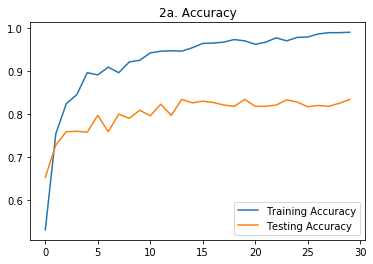

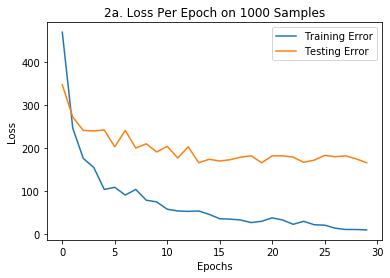

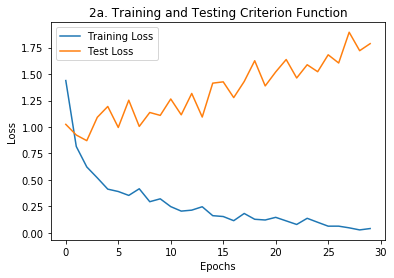

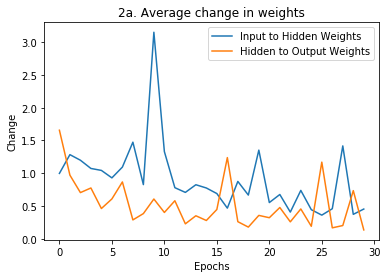

In [178]:
plotModel1HL('2a. ',results2a)

# Soln 2b:

Specifications:

-->2 hidden layers of 30 sigmoid nodes

-->Output layer of 10 softmax nodes

-->1000 training images

-->1000 testing images

-->Learning Rate 0.1

-->30 epochs

-->Mini-batches of 10 images at a time

In [179]:
model2b1=Sequential()
model2b1.add((Dense(30, input_shape = (784,), activation = 'sigmoid')))
model2b1.add((Dense(30, activation = 'sigmoid')))
model2b1.add((Dense(10, activation = 'softmax')))
model2b1.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(lr = 0.1), metrics=['accuracy'])

In [180]:
results2b1=trainingModel2Hl(model2b1)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 639us/sample - loss: 2.1316 - accuracy: 0.2260 - val_loss: 1.7940 - val_accuracy: 0.3720
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 278us/sample - loss: 1.2411 - accuracy: 0.5770 - val_loss: 1.1907 - val_accuracy: 0.6120
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 290us/sample - loss: 0.8656 - accuracy: 0.7210 - val_loss: 1.1111 - val_accuracy: 0.6720
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 281us/sample - loss: 0.7013 - accuracy: 0.7920 - val_loss: 1.1721 - val_accuracy: 0.6660
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 311us/sample - loss: 0.7272 - accuracy: 0.7930 - val_loss: 0.9669 - val_accuracy: 0.7070
Train on 1000 samples, validate on 1000 samples
1000/1000 [================

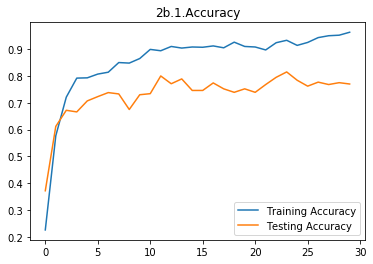

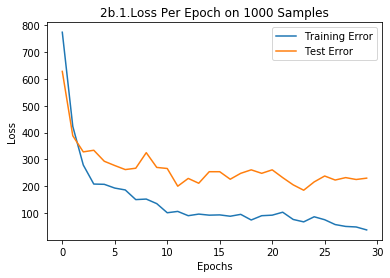

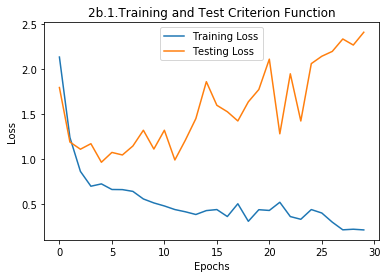

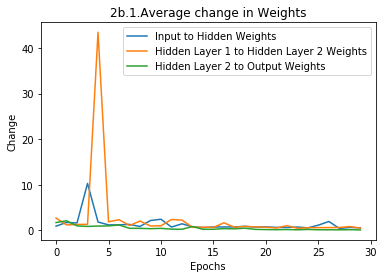

In [181]:
plotModel2Hl('2b.1.',results2b1)

# Soln 2b:

Specifications:

-->3 hidden layers of 30 sigmoid nodes

-->Output layer of 10 softmax nodes

-->1000 training images

-->1000 testing images

-->Learning Rate 0.1

-->30 epochs

-->Mini-batches of 10 images at a time

In [182]:
model2b2 = Sequential()
model2b2.add((Dense(30, input_shape = (784,), activation = 'sigmoid')))
model2b2.add((Dense(30, activation = 'sigmoid')))
model2b2.add((Dense(30, activation = 'sigmoid')))
model2b2.add((Dense(10, activation = 'softmax')))
model2b2.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(lr = 0.1), metrics=['accuracy'])

In [183]:
results2b2=trainingModel3Hl(model2b2)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 719us/sample - loss: 2.3791 - accuracy: 0.0880 - val_loss: 2.2795 - val_accuracy: 0.1140
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 294us/sample - loss: 2.0959 - accuracy: 0.1700 - val_loss: 1.9718 - val_accuracy: 0.1870
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 297us/sample - loss: 1.7802 - accuracy: 0.3260 - val_loss: 1.7036 - val_accuracy: 0.3190
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 285us/sample - loss: 1.4949 - accuracy: 0.4050 - val_loss: 1.7559 - val_accuracy: 0.4060
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 268us/sample - loss: 1.5350 - accuracy: 0.4330 - val_loss: 1.5057 - val_accuracy: 0.4630
Train on 1000 samples, validate on 1000 samples
1000/1000 [================

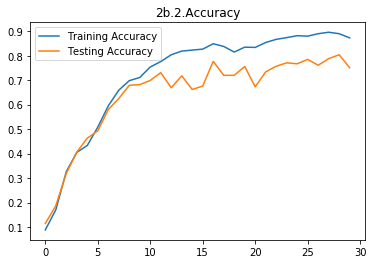

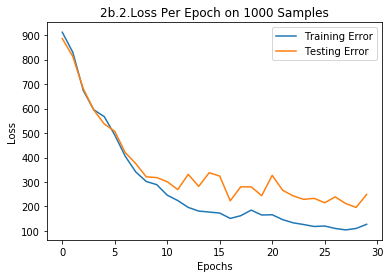

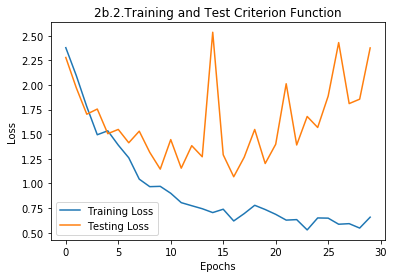

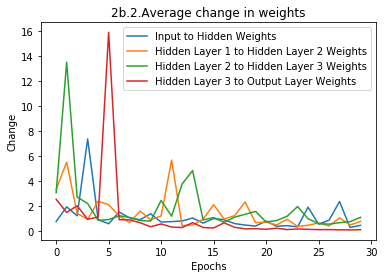

In [184]:
plotModel3Hl('2b.2.',results2b2)

# Soln 2b

Specifications:

-->1 hidden layer of 30 sigmoid nodes

-->Output layer of 10 softmax nodes

-->1000 training images

-->1000 testing images

-->Learning Rate 0.1

-->30 epochs

-->Mini-batches of 10 images at a time

-->Regularization with $\lambda= 5$

In [185]:
model2b3 = Sequential()
model2b3.add((Dense(30, input_shape = (784,), activation = 'sigmoid', kernel_regularizer = regularizers.l2(5), bias_regularizer=regularizers.l2(5))))
model2b3.add((Dense(10, activation = 'softmax')))
model2b3.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(lr = 0.1), metrics=['accuracy'])

In [186]:
results2b3=trainingModel1HL(model2b3)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 645us/sample - loss: 342.8471 - accuracy: 0.1060 - val_loss: 293.8692 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 256us/sample - loss: 297.4244 - accuracy: 0.1040 - val_loss: 297.1263 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 266us/sample - loss: 297.4471 - accuracy: 0.0980 - val_loss: 300.1099 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 267us/sample - loss: 297.5711 - accuracy: 0.0860 - val_loss: 297.5366 - val_accuracy: 0.0980
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 263us/sample - loss: 297.4600 - accuracy: 0.0940 - val_loss: 295.9958 - val_accuracy: 0.0890
Train on 1000 samples, validate on 1000 samples
1000/10

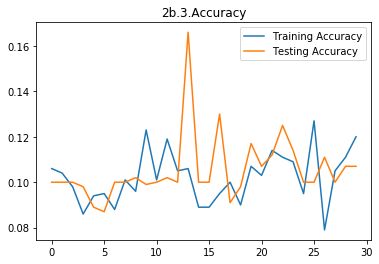

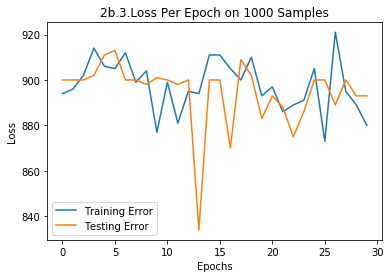

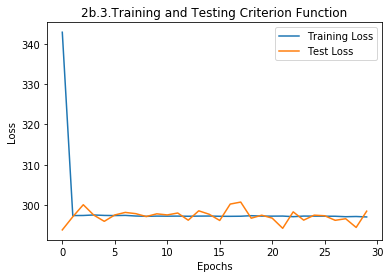

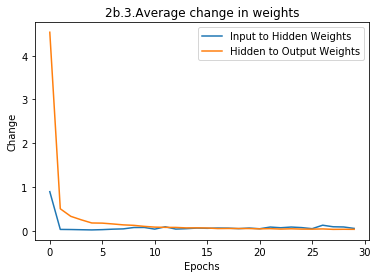

In [187]:
plotModel1HL('2b.3.',results2b3)

# Soln 2b

Specifications:

-->2 hidden layers of 30 sigmoid nodes

-->Output layer of 10 softmax nodes

-->1000 training images

-->1000 testing images

-->Learning Rate 0.1

-->30 epochs

-->Mini-batches of 10 images at a time

-->Regularization with $\lambda= 5$

In [188]:
model2b4=Sequential()
model2b4.add((Dense(30, input_shape = (784,), activation = 'sigmoid',kernel_regularizer = regularizers.l2(5), bias_regularizer=regularizers.l2(5))))
model2b4.add((Dense(30, activation = 'sigmoid', kernel_regularizer = regularizers.l2(5), bias_regularizer=regularizers.l2(5))))
model2b4.add((Dense(10, activation = 'softmax')))
model2b4.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(lr = 0.1), metrics=['accuracy'])

In [189]:
results2b4=trainingModel2Hl(model2b4)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 1s 763us/sample - loss: 353.5237 - accuracy: 0.0950 - val_loss: 307.7971 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 293us/sample - loss: 308.8722 - accuracy: 0.0900 - val_loss: 308.5127 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 281us/sample - loss: 308.9916 - accuracy: 0.1040 - val_loss: 308.7323 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 280us/sample - loss: 309.0373 - accuracy: 0.0920 - val_loss: 307.9981 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 285us/sample - loss: 309.0815 - accuracy: 0.0980 - val_loss: 308.1277 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/10

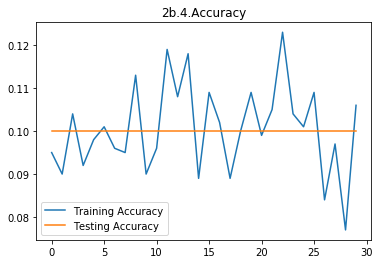

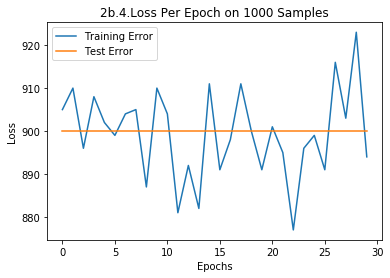

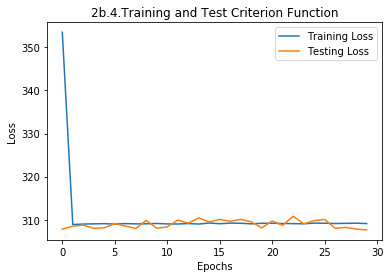

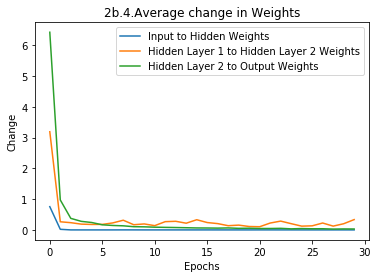

In [190]:
plotModel2Hl('2b.4.',results2b4)

# Soln 2b

Specifications:

-->3 hidden layers of 30 sigmoid nodes

-->Output layer of 10 softmax nodes

-->1000 training images

-->1000 testing images

-->Learning Rate 0.1

-->30 epochs

-->Mini-batches of 10 images at a time

-->Regularization with $\lambda= 5$

In [191]:
model2b5 = Sequential()
model2b5.add((Dense(30, input_shape = (784,), activation = 'sigmoid')))
model2b5.add((Dense(30, activation = 'sigmoid', kernel_regularizer = regularizers.l2(5), bias_regularizer=regularizers.l2(5))))
model2b5.add((Dense(30, activation = 'sigmoid',kernel_regularizer = regularizers.l2(5), bias_regularizer=regularizers.l2(5))))
model2b5.add((Dense(10, activation = 'softmax')))
model2b5.compile(loss = 'sparse_categorical_crossentropy', optimizer = RMSprop(lr = 0.1), metrics=['accuracy'])

In [192]:
results2b5=trainingModel3Hl(model2b5)

Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 3s 3ms/sample - loss: 29.6074 - accuracy: 0.1090 - val_loss: 26.4578 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 402us/sample - loss: 26.2006 - accuracy: 0.0880 - val_loss: 25.5173 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 282us/sample - loss: 26.1649 - accuracy: 0.1060 - val_loss: 26.3383 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 297us/sample - loss: 26.1910 - accuracy: 0.1030 - val_loss: 26.1805 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [==============================] - 0s 287us/sample - loss: 26.2206 - accuracy: 0.1000 - val_loss: 26.0152 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
1000/1000 [========

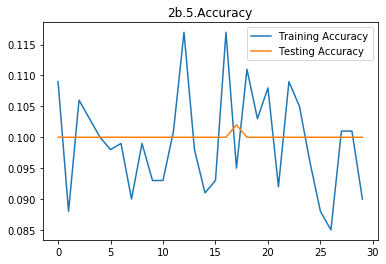

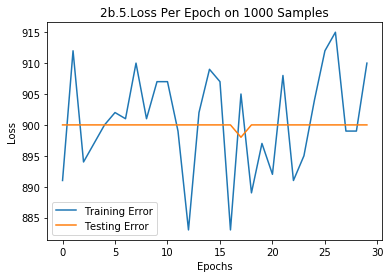

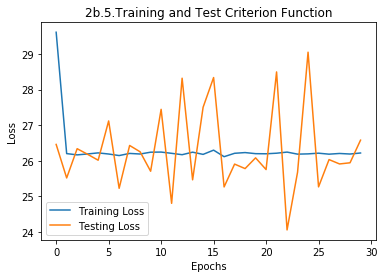

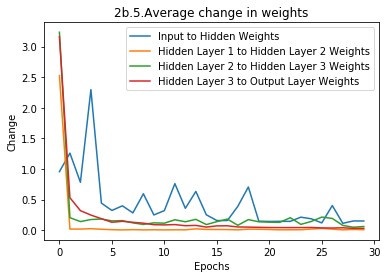

In [193]:
plotModel3Hl('2b.5.',results2b5)

# Soln 2c:

Specifications:

-->CNN with dropout(0.2)

-->1000 training images

-->1000 testing images

-->30 epochs

In [194]:
import cv2
model2c1 = Sequential()
model2c1.add(Conv2D(16, (3,3), input_shape = (28,28,1), activation = 'relu',padding = 'same'))
model2c1.add(MaxPooling2D(2,2))
model2c1.add(Dropout(0.2))
model2c1.add(Conv2D(16, (3,3), activation = 'relu'))
model2c1.add(MaxPooling2D(2,2))
model2c1.add(Dropout(0.2))
model2c1.add(Flatten())
model2c1.add(Dense(128, activation = 'relu'))
model2c1.add(Dense(10,activation = 'softmax'))
model2c1.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

In [195]:
# Clockwise rotation

cDirection=[1,2,3]
antiCDirection=[-1,-2,-3]

accuracyCNN=[]
valAccuracyCNN=[]
trainLossCNN=[]
trainValCNN=[]
trainDataPerDigit=np.array(trainDataPerDigit)
trainData1=trainDataPerDigit.reshape(1000,28,28,1)
testData1=testDataPerDigit.reshape(1000,28,28,1)
for i in range(len(cDirection)):
#     trainData1=trainDataPerDigit.reshape(trainDataPerDigit[0].shape,28,28,1)
#     testData1=testDataPerDigit.reshape(testDataPerDigit[0].shape,28,28,1)
    for j in range(len(trainDataPerDigit)):
        clockMatrix1=cv2.getRotationMatrix2D((14,14),cDirection[i],1)
        rotatedImage1=cv2.warpAffine(trainData1[j],clockMatrix1,(28,28))
        trainData1[j]=rotatedImage1.flatten().reshape(28,28,1)
    for k in range(len(testDataPerDigit)):
        clockMatrix2=cv2.getRotationMatrix2D((14,14),cDirection[i],1)
        rotatedImage2=cv2.warpAffine(testData1[k],clockMatrix2,(28,28))
        testData1[k]=rotatedImage2.flatten().reshape(28,28,1)
    historyCNN=model2c1.fit(trainData1,trainLabelPerDigit,batch_size=10,epochs=30,validation_data=(testData1,testLabelPerDigit))
    accuracyCNN.append(historyCNN.history['accuracy'])
    valAccuracyCNN.append(historyCNN.history['val_accuracy'])
    trainLossCNN.append(historyCNN.history['loss'])
    trainValCNN.append(historyCNN.history['val_loss'])
    

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.3372 - accuracy: 0.5520 - val_loss: 0.5863 - val_accuracy: 0.8220
Epoch 2/30
1000/1000 [==============================] - 1s 720us/sample - loss: 0.4332 - accuracy: 0.8600 - val_loss: 0.2959 - val_accuracy: 0.9030
Epoch 3/30
1000/1000 [==============================] - 1s 669us/sample - loss: 0.2838 - accuracy: 0.9100 - val_loss: 0.3221 - val_accuracy: 0.8970
Epoch 4/30
1000/1000 [==============================] - 1s 669us/sample - loss: 0.2402 - accuracy: 0.9160 - val_loss: 0.2430 - val_accuracy: 0.9290
Epoch 5/30
1000/1000 [==============================] - 1s 650us/sample - loss: 0.1992 - accuracy: 0.9350 - val_loss: 0.2954 - val_accuracy: 0.9060
Epoch 6/30
1000/1000 [==============================] - 1s 675us/sample - loss: 0.1957 - accuracy: 0.9400 - val_loss: 0.2230 - val_accuracy: 0.9350
Epoch 7/30
1000/1000 [==============================] - 1s 664us/s

1000/1000 [==============================] - 1s 649us/sample - loss: 0.1985 - accuracy: 0.9600 - val_loss: 0.5942 - val_accuracy: 0.8770
Epoch 26/30
1000/1000 [==============================] - 1s 647us/sample - loss: 0.1550 - accuracy: 0.9650 - val_loss: 0.3946 - val_accuracy: 0.9160
Epoch 27/30
1000/1000 [==============================] - 1s 639us/sample - loss: 0.0695 - accuracy: 0.9800 - val_loss: 0.3712 - val_accuracy: 0.9350
Epoch 28/30
1000/1000 [==============================] - 1s 638us/sample - loss: 0.0418 - accuracy: 0.9880 - val_loss: 0.3180 - val_accuracy: 0.9340
Epoch 29/30
1000/1000 [==============================] - 1s 634us/sample - loss: 0.0545 - accuracy: 0.9860 - val_loss: 0.4983 - val_accuracy: 0.9070
Epoch 30/30
1000/1000 [==============================] - 1s 639us/sample - loss: 0.0783 - accuracy: 0.9790 - val_loss: 0.3402 - val_accuracy: 0.9310
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 617us/sampl

In [196]:
# Anti-clockwise rotation

model2c2 = Sequential()
model2c2.add(Conv2D(16, (3,3), input_shape = (28,28,1), activation = 'relu',padding = 'same'))
model2c2.add(MaxPooling2D(2,2))
model2c2.add(Dropout(0.2))
model2c2.add(Conv2D(16, (3,3), activation = 'relu'))
model2c2.add(MaxPooling2D(2,2))
model2c2.add(Dropout(0.2))
model2c2.add(Flatten())
model2c2.add(Dense(128, activation = 'relu'))
model2c2.add(Dense(10,activation = 'softmax'))
model2c2.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

accuracyCNN2=[]
valAccuracyCNN2=[]
trainLossCNN2=[]
trainValCNN2=[]
trainData2=trainDataPerDigit.reshape(1000,28,28,1)
testData2=testDataPerDigit.reshape(1000,28,28,1)
for i in range(len(antiCDirection)):
    for j in range(len(trainDataPerDigit)):
        clockMatrix2=cv2.getRotationMatrix2D((14,14),antiCDirection[i],1)
        rotatedImage2=cv2.warpAffine(trainData1[j],clockMatrix2,(28,28))
        trainData2[j]=rotatedImage2.flatten().reshape(28,28,1)
        clockMatrix2=cv2.getRotationMatrix2D((14,14),cDirection[i],1)
        rotatedImage2=cv2.warpAffine(testData1[j],clockMatrix2,(28,28))
        testData2[j]=rotatedImage2.flatten().reshape(28,28,1)
    historyCNN2=model2c2.fit(trainData2,trainLabelPerDigit,batch_size=10,epochs=30,validation_data=(testData2,testLabelPerDigit))
    accuracyCNN2.append(historyCNN2.history['accuracy'])
    valAccuracyCNN2.append(historyCNN2.history['val_accuracy'])
    trainLossCNN2.append(historyCNN2.history['loss'])
    trainValCNN2.append(historyCNN2.history['val_loss'])
    

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 1ms/sample - loss: 1.1935 - accuracy: 0.6130 - val_loss: 0.5230 - val_accuracy: 0.8520
Epoch 2/30
1000/1000 [==============================] - 1s 763us/sample - loss: 0.4243 - accuracy: 0.8750 - val_loss: 0.5378 - val_accuracy: 0.8420
Epoch 3/30
1000/1000 [==============================] - 1s 765us/sample - loss: 0.3408 - accuracy: 0.8930 - val_loss: 0.4057 - val_accuracy: 0.8650
Epoch 4/30
1000/1000 [==============================] - 1s 789us/sample - loss: 0.2478 - accuracy: 0.9230 - val_loss: 0.3830 - val_accuracy: 0.8950
Epoch 5/30
1000/1000 [==============================] - 1s 731us/sample - loss: 0.2423 - accuracy: 0.9290 - val_loss: 0.2828 - val_accuracy: 0.9260
Epoch 6/30
1000/1000 [==============================] - 1s 659us/sample - loss: 0.2219 - accuracy: 0.9270 - val_loss: 0.4113 - val_accuracy: 0.8760
Epoch 7/30
1000/1000 [==============================] - 1s 677us/s

1000/1000 [==============================] - 1s 741us/sample - loss: 0.0927 - accuracy: 0.9780 - val_loss: 0.3999 - val_accuracy: 0.9240
Epoch 26/30
1000/1000 [==============================] - 1s 656us/sample - loss: 0.1379 - accuracy: 0.9740 - val_loss: 0.5670 - val_accuracy: 0.9100
Epoch 27/30
1000/1000 [==============================] - 1s 764us/sample - loss: 0.2022 - accuracy: 0.9560 - val_loss: 0.4725 - val_accuracy: 0.9180
Epoch 28/30
1000/1000 [==============================] - 1s 690us/sample - loss: 0.0870 - accuracy: 0.9850 - val_loss: 0.4335 - val_accuracy: 0.9190
Epoch 29/30
1000/1000 [==============================] - 1s 720us/sample - loss: 0.0594 - accuracy: 0.9800 - val_loss: 0.6018 - val_accuracy: 0.9150
Epoch 30/30
1000/1000 [==============================] - 1s 666us/sample - loss: 0.1818 - accuracy: 0.9610 - val_loss: 0.7370 - val_accuracy: 0.9060
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 782us/sampl

In [197]:
from PIL import Image
model2c3 = Sequential()
model2c3.add(Conv2D(16, (3,3), input_shape = (28,28,1), activation = 'relu',padding = 'same'))
model2c3.add(MaxPooling2D(2,2))
model2c3.add(Dropout(0.2))
model2c3.add(Conv2D(16, (3,3), activation = 'relu'))
model2c3.add(MaxPooling2D(2,2))
model2c3.add(Dropout(0.2))
model2c3.add(Flatten())
model2c3.add(Dense(128, activation = 'relu'))
model2c3.add(Dense(10,activation = 'softmax'))
model2c3.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['accuracy'])

# Rotating in 8 directions

x=[0,0,1,1,1,-1,-1,-1]
y=[-1,1,1,0,-1,1,0,-1]
dim=[28,28,1]
accuracyCNN3=[]
valAccuracyCNN3=[]
trainLossCNN3=[]
trainValLossCNN3=[]
trainData3=trainDataPerDigit.reshape(1000,28,28,1)
testData3=testDataPerDigit.reshape(1000,28,28,1)
for i in range(len(y)):
    for j in range(len(trainData3)):
        trainDataShifted=trainData3[j].reshape(28,28)
        trainShift=Image.fromarray(np.uint8(trainDataShifted))
        trainShift=trainShift.transform(trainDataShifted.shape,Image.AFFINE,(1,0,x[i]*3,0,1,y[i]*3))
        trainFinal=np.array(trainShift)
        trainData3[j]=trainFinal.flatten().reshape(28,28,1)
        testDataShifted=testData3[j].reshape(28,28)
        testShift=Image.fromarray(np.uint8(testDataShifted))
        testShift=testShift.transform(testDataShifted.shape,Image.AFFINE,(1,0,x[i]*3,0,1,y[i]*3))
        testFinal=np.array(testShift)
        testData3[j]=testFinal.flatten().reshape(28,28,1)
        
    historyCNN3=model2c3.fit(trainData3,trainLabelPerDigit,batch_size=10,epochs=30,validation_data=(testData3,testLabelPerDigit))
    accuracyCNN3.append(historyCNN3.history['accuracy'])
    valAccuracyCNN3.append(historyCNN3.history['val_accuracy'])
    trainLossCNN3.append(historyCNN3.history['loss'])
    trainValLossCNN3.append(historyCNN3.history['val_loss'])


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 1ms/sample - loss: 2.3085 - accuracy: 0.0950 - val_loss: 2.2920 - val_accuracy: 0.1120
Epoch 2/30
1000/1000 [==============================] - 1s 670us/sample - loss: 2.3022 - accuracy: 0.0930 - val_loss: 2.3060 - val_accuracy: 0.1000
Epoch 3/30
1000/1000 [==============================] - 1s 699us/sample - loss: 2.3056 - accuracy: 0.0950 - val_loss: 2.2938 - val_accuracy: 0.1120
Epoch 4/30
1000/1000 [==============================] - 1s 693us/sample - loss: 2.2932 - accuracy: 0.1010 - val_loss: 2.3007 - val_accuracy: 0.1050
Epoch 5/30
1000/1000 [==============================] - 1s 671us/sample - loss: 2.3013 - accuracy: 0.0940 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 6/30
1000/1000 [==============================] - 1s 671us/sample - loss: 2.2982 - accuracy: 0.0930 - val_loss: 2.2923 - val_accuracy: 0.1120
Epoch 7/30
1000/1000 [==============================] - 1s 670us/s

1000/1000 [==============================] - 1s 672us/sample - loss: 2.3073 - accuracy: 0.0800 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 26/30
1000/1000 [==============================] - 1s 661us/sample - loss: 2.3063 - accuracy: 0.0870 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 27/30
1000/1000 [==============================] - 1s 647us/sample - loss: 2.3061 - accuracy: 0.0720 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 28/30
1000/1000 [==============================] - 1s 632us/sample - loss: 2.3058 - accuracy: 0.0790 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 29/30
1000/1000 [==============================] - 1s 673us/sample - loss: 2.3072 - accuracy: 0.0840 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 30/30
1000/1000 [==============================] - 1s 631us/sample - loss: 2.3067 - accuracy: 0.0920 - val_loss: 2.3028 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 651us/sampl

1000/1000 [==============================] - 1s 580us/sample - loss: 2.3056 - accuracy: 0.0960 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 20/30
1000/1000 [==============================] - 1s 571us/sample - loss: 2.3066 - accuracy: 0.0740 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 21/30
1000/1000 [==============================] - 1s 765us/sample - loss: 2.3057 - accuracy: 0.0900 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 22/30
1000/1000 [==============================] - 1s 732us/sample - loss: 2.3062 - accuracy: 0.0790 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 23/30
1000/1000 [==============================] - 1s 747us/sample - loss: 2.3061 - accuracy: 0.0740 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 24/30
1000/1000 [==============================] - 1s 649us/sample - loss: 2.3065 - accuracy: 0.0890 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 25/30
1000/1000 [==============================] - 1s 617us/sample - loss: 2.3067 - accuracy: 0.0810 - val_loss:

1000/1000 [==============================] - 1s 811us/sample - loss: 2.3072 - accuracy: 0.0810 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 14/30
1000/1000 [==============================] - 1s 685us/sample - loss: 2.3060 - accuracy: 0.0780 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 15/30
1000/1000 [==============================] - 1s 776us/sample - loss: 2.3064 - accuracy: 0.0800 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 16/30
1000/1000 [==============================] - 1s 596us/sample - loss: 2.3071 - accuracy: 0.0890 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 17/30
1000/1000 [==============================] - 1s 751us/sample - loss: 2.3064 - accuracy: 0.0820 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 18/30
1000/1000 [==============================] - 1s 846us/sample - loss: 2.3059 - accuracy: 0.0880 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 19/30
1000/1000 [==============================] - 1s 696us/sample - loss: 2.3064 - accuracy: 0.0840 - val_loss:

1000/1000 [==============================] - 1s 772us/sample - loss: 2.3061 - accuracy: 0.0850 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 8/30
1000/1000 [==============================] - 1s 685us/sample - loss: 2.3058 - accuracy: 0.0920 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 9/30
1000/1000 [==============================] - 1s 691us/sample - loss: 2.3062 - accuracy: 0.0860 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 10/30
1000/1000 [==============================] - 1s 944us/sample - loss: 2.3068 - accuracy: 0.0870 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 11/30
1000/1000 [==============================] - 1s 810us/sample - loss: 2.3056 - accuracy: 0.0830 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 12/30
1000/1000 [==============================] - 1s 773us/sample - loss: 2.3065 - accuracy: 0.0780 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 13/30
1000/1000 [==============================] - 1s 902us/sample - loss: 2.3060 - accuracy: 0.0820 - val_loss: 2

Text(0, 0.5, 'Loss')

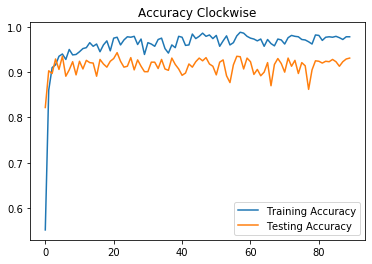

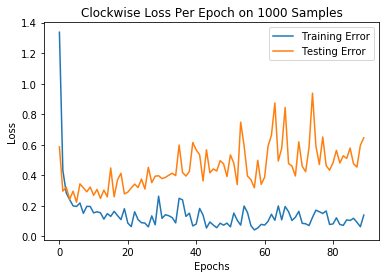

In [215]:
# Plotting graphs for clockwise training

accuracyCNN11=[]
valAccCNN11=[]
for i in accuracyCNN:
    for j in i:
        accuracyCNN11.append(j)

for i in valAccuracyCNN:
    for j in i:
        valAccCNN11.append(j)

plt.figure()
plt.title("Accuracy Clockwise")
plt.plot(accuracyCNN11,label="Training Accuracy")
plt.plot(valAccCNN11,label="Testing Accuracy")
plt.legend()

tLossCNN11=[]
vLossCNN11=[]
for i in trainLossCNN:
    for j in i:
        tLossCNN11.append(j)

for i in trainValCNN:
    for j in i:
        vLossCNN11.append(j)



plt.figure()
plt.title('Clockwise Loss Per Epoch on 1000 Samples')
plt.plot(tLossCNN11, label = 'Training Error')
plt.plot(vLossCNN11, label = 'Testing Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

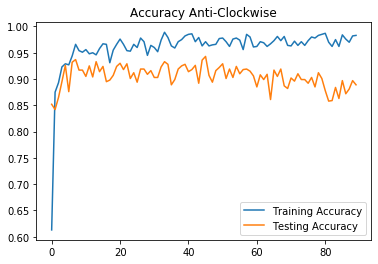

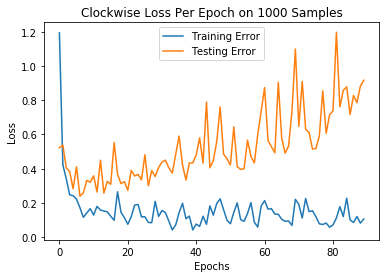

In [213]:
# Plotting graphs for anti-clockwise training
accuracyCNN21=[]
valAccCNN21=[]
for i in accuracyCNN2:
    for j in i:
        accuracyCNN21.append(j)

for i in valAccuracyCNN2:
    for j in i:
        valAccCNN21.append(j)

plt.figure()
plt.title("Accuracy Anti-Clockwise")
plt.plot(accuracyCNN21,label="Training Accuracy")
plt.plot(valAccCNN21,label="Testing Accuracy")
plt.legend()

tLossCNN21=[]
vLossCNN21=[]
for i in trainLossCNN2:
    for j in i:
        tLossCNN21.append(j)

for i in trainValCNN2:
    for j in i:
        vLossCNN21.append(j)


plt.figure()
plt.title('Clockwise Loss Per Epoch on 1000 Samples')
plt.plot(tLossCNN21, label = 'Training Error')
plt.plot(vLossCNN21, label = 'Testing Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

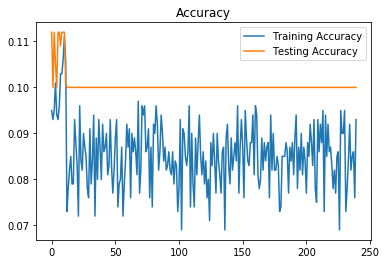

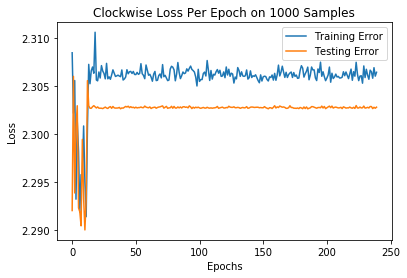

In [218]:
# Plotting graphs for 8-direction rotated inputs

accuracyCNN31=[]
valAccCNN31=[]
for i in accuracyCNN3:
    for j in i:
        accuracyCNN31.append(j)

for i in valAccuracyCNN3:
    for j in i:
        valAccCNN31.append(j)

plt.figure()
plt.title("Accuracy")
plt.plot(accuracyCNN31,label="Training Accuracy")
plt.plot(valAccCNN31,label="Testing Accuracy")
plt.legend()

tLossCNN31=[]
vLossCNN31=[]
for i in trainLossCNN3:
    for j in i:
        tLossCNN31.append(j)

for i in trainValLossCNN3:
    for j in i:
        vLossCNN31.append(j)


plt.figure()
plt.title('Clockwise Loss Per Epoch on 1000 Samples')
plt.plot(tLossCNN31, label = 'Training Error')
plt.plot(vLossCNN31, label = 'Testing Error')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

# References
1. Pattern Classification book
2. Slides
3. https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior
4. https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/
5. https://towardsdatascience.com/softmax-function-simplified-714068bf8156
6. https://datascience.stackexchange.com/questions/13828/what-does-negative-log-likelihood-mean
7. https://en.wikipedia.org/wiki/Softmax_function
8. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c